----

<h3 style="text-align: center; ">★ Machine Learning Project - AI-Powered Job Market Insights ★</h3>


----

<h3 style="text-align: center;">Strategic Plan of Action</h3>

<p><strong>To address the problem statement effectively, we have devised the following plan of action:</strong></p>


#### **Data Exploration**

>      
> - Examine the structure and key characteristics of the dataset.
> - Identify important variables and data types.
> - Address missing values, outliers, and data inconsistencies.
> - Ensure data types are appropriate and formats are standardized.
>
       
    
       
#### **Exploratory Data Analysis (EDA)**

> - Conduct univariate, bivariate, and multivariate analyses to uncover patterns and relationships in the data.
> - Visualize the findings using suitable plots and charts.

### Tools and Libraries
- **Python Libraries**: Pandas, Matplotlib, Seaborn.
    

---

## **Data Exploration**



In [1]:
import pandas as pd

In [2]:
data =pd.read_csv("dataset/ai_job_market_insights.csv")

In [3]:
data.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
data.shape

(500, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [42]:
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percent = (missing_count / data.shape[0]) * 100
    print(f"{column:<20}: Missing {missing_count:<5} values  ==> {missing_percent:>6.2f}%")


Job_Title           : Missing 0     values  ==>   0.00%
Industry            : Missing 0     values  ==>   0.00%
Company_Size        : Missing 0     values  ==>   0.00%
Location            : Missing 0     values  ==>   0.00%
AI_Adoption_Level   : Missing 0     values  ==>   0.00%
Automation_Risk     : Missing 0     values  ==>   0.00%
Required_Skills     : Missing 0     values  ==>   0.00%
Salary_USD          : Missing 0     values  ==>   0.00%
Remote_Friendly     : Missing 0     values  ==>   0.00%
Job_Growth_Projection: Missing 0     values  ==>   0.00%


In [7]:
Q1 = data['Salary_USD'].quantile(0.25)
Q3 = data['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = data[(data['Salary_USD'] >= (Q1 - 1.5 * IQR)) & (data['Salary_USD'] <= (Q3 + 1.5 * IQR))]

data = filtered_data


----

#  **Data Visualization**



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_18352\2634670726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(0, 0.5, 'Industry')

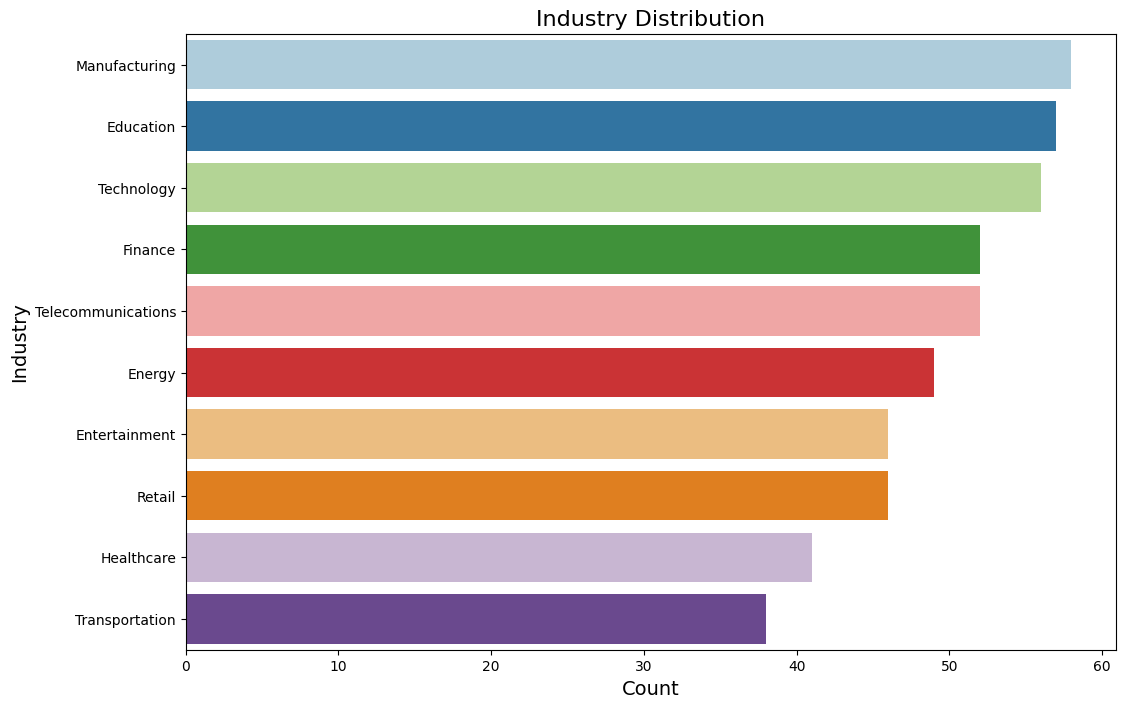

In [9]:
plt.figure(figsize=(12, 8))

sns.countplot(
    y=data["Industry"], 
    palette='Paired', 
    order=data["Industry"].value_counts().index  
)

plt.title('Industry Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Industry', fontsize=14)
 

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_18352\4168970330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Job_Title', x=data['Salary_USD'], data=data, palette='Set2')


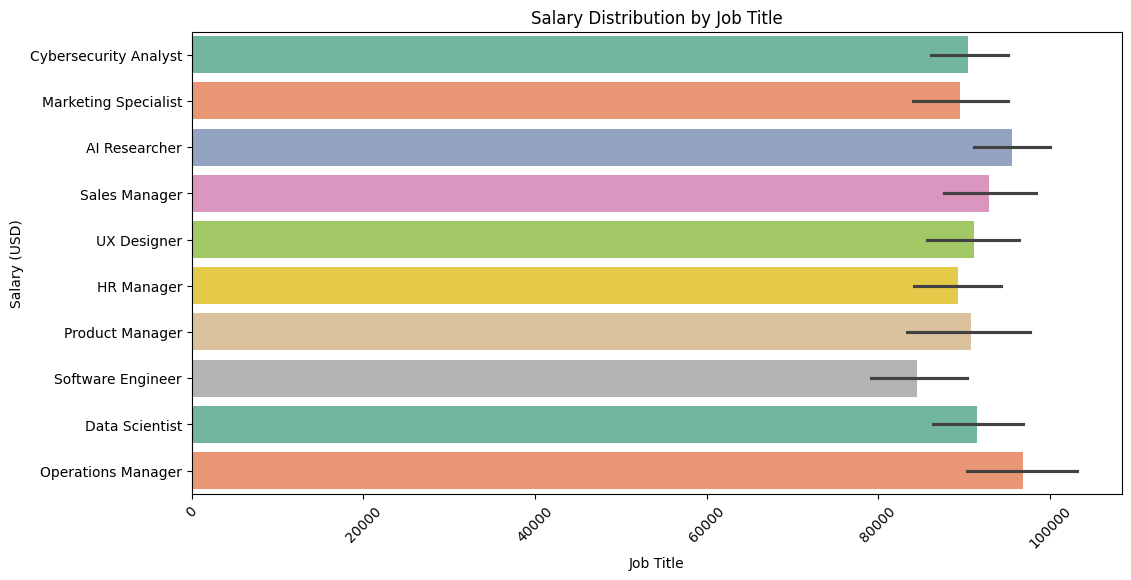

In [10]:

plt.figure(figsize=(12, 6))
sns.barplot(y='Job_Title', x=data['Salary_USD'], data=data, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Job Title')

plt.show()


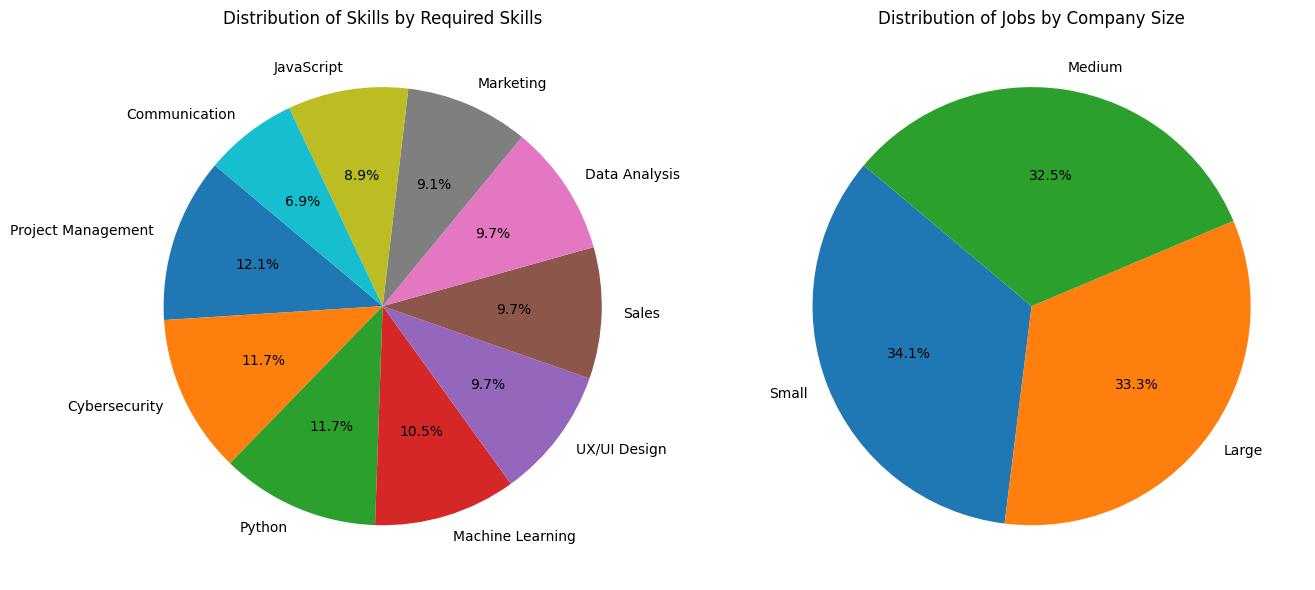

In [28]:
skills_counts = data['Required_Skills'].value_counts()
company_size_counts = data['Company_Size'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(skills_counts, labels=skills_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Skills by Required Skills')

axs[1].pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Jobs by Company Size')

plt.tight_layout()
plt.show()

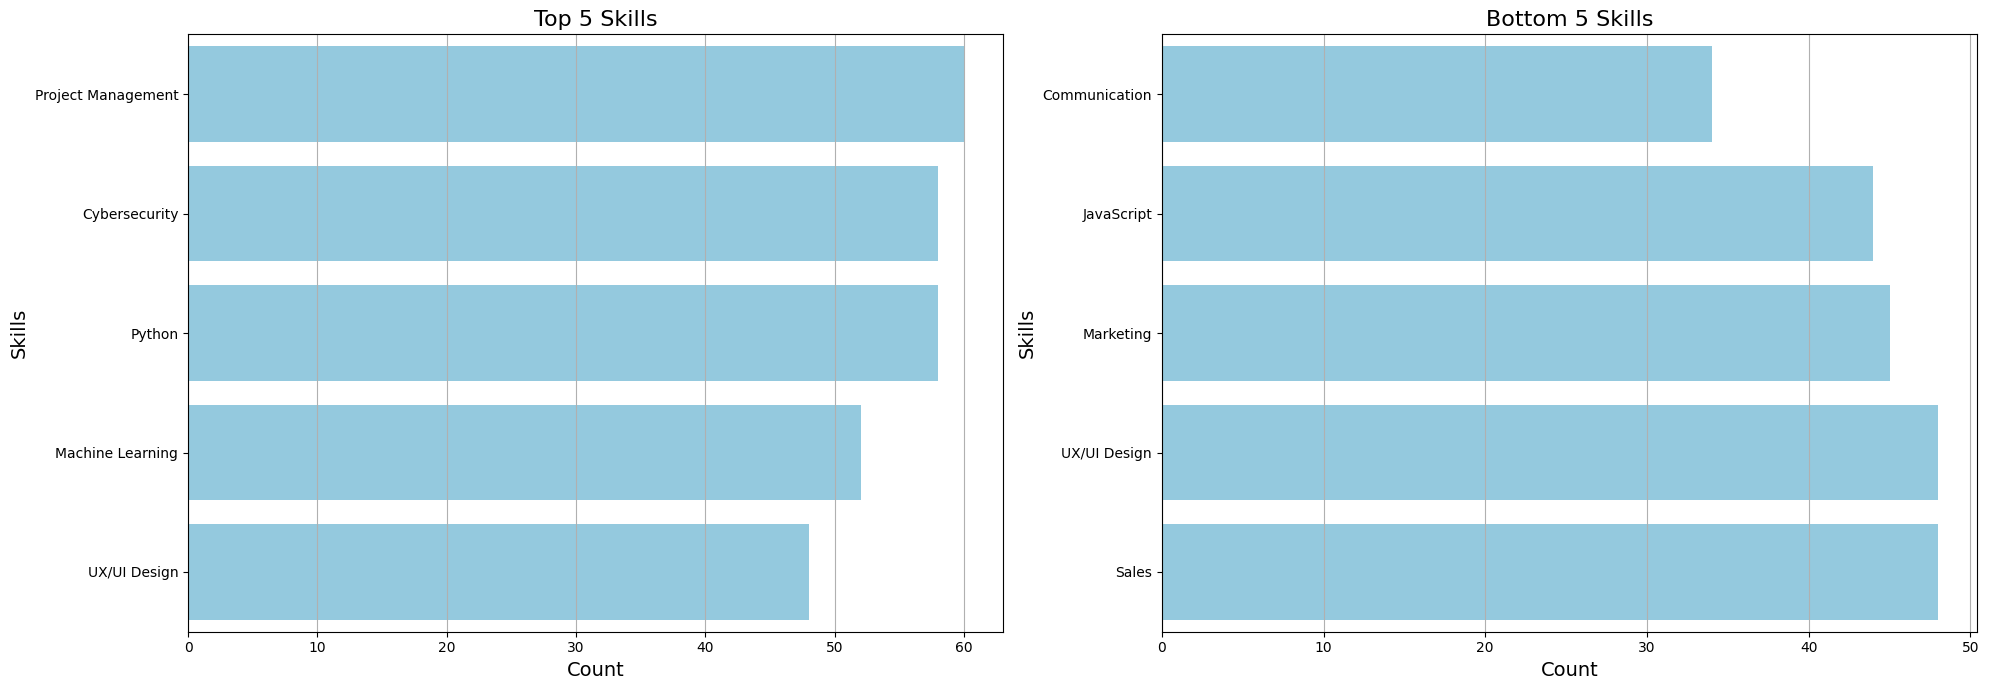

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.barplot(
    ax=axes[0], 
    y=data["Required_Skills"].value_counts().nlargest(5).index,
    x=data["Required_Skills"].value_counts().nlargest(5).values,
    color='skyblue'
)
axes[0].set_title('Top 5 Skills', fontsize=16)
axes[0].set_xlabel('Count', fontsize=14)
axes[0].set_ylabel('Skills', fontsize=14)
axes[0].grid(axis='x') 

sns.barplot(
    ax=axes[1],  
    y=data["Required_Skills"].value_counts().nsmallest(5).index,
    x=data["Required_Skills"].value_counts().nsmallest(5).values,
    color='skyblue'
)
axes[1].set_title('Bottom 5 Skills', fontsize=16)
axes[1].set_xlabel('Count', fontsize=14)
axes[1].set_ylabel('Skills', fontsize=14)
axes[1].grid(axis='x') 

plt.tight_layout()
plt.show()

In [31]:
data.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

<Axes: xlabel='Salary_USD', ylabel='Density'>

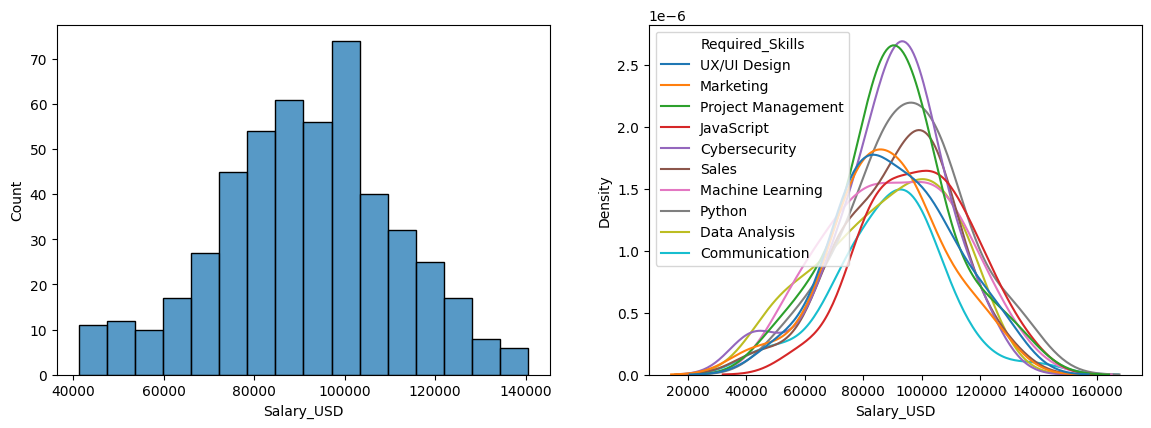

In [36]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Salary_USD', data=data)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Salary_USD', hue='Required_Skills', data=data)


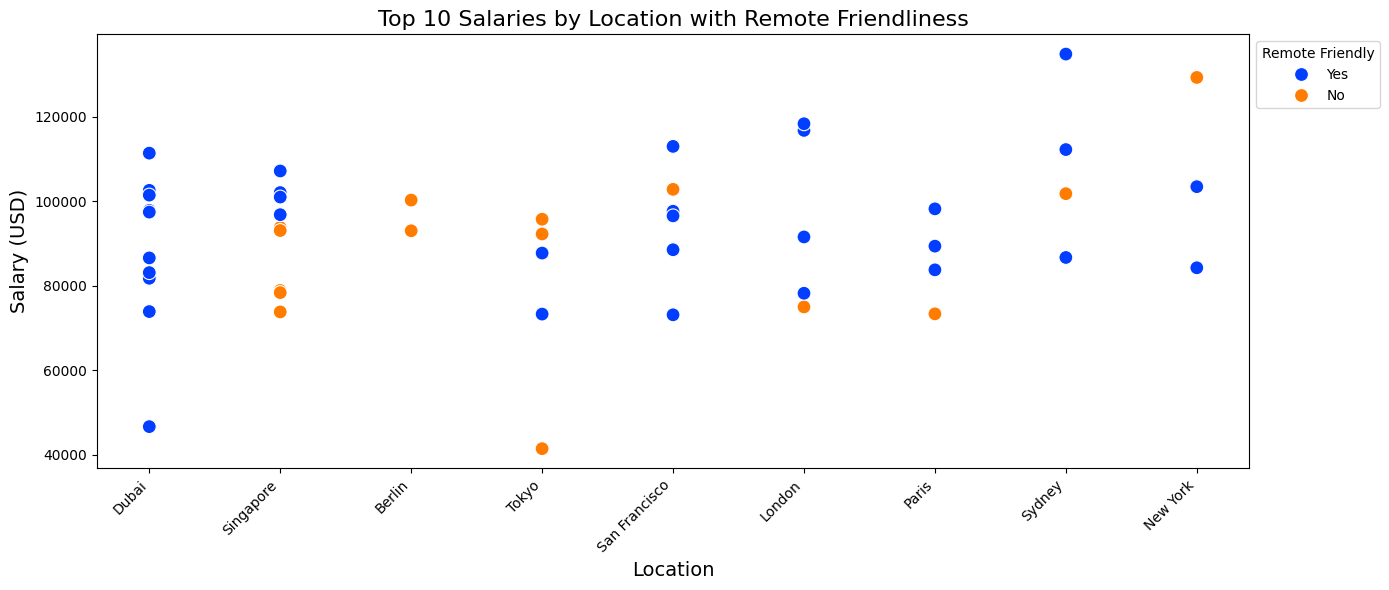

In [12]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    y=data["Salary_USD"].head(50), 
    x=data["Location"].head(50), 
    hue=data["Remote_Friendly"], 
    palette='bright', s=100
)

plt.title('Top 10 Salaries by Location with Remote Friendliness', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Remote Friendly', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


---

## **Conclusion**
The visualizations reveal key trends in the AI job market, such as the prominence of certain industries, the geographical distribution of high-paying jobs, and the potential financial benefits of remote work. These insights can guide job seekers and companies alike in navigating the rapidly evolving landscape of AI employment.

By filtering out outliers and focusing on clear data trends, the analysis provides a robust view of the current AI job market, highlighting opportunities for growth and investment.



---